In [69]:
!pip install elm

     |████████████████████████████████| 936 kB 16.6 MB/s 
     |████████████████████████████████| 4.6 MB 46.4 MB/s 
     |████████████████████████████████| 13.8 MB 20 kB/s 
  Created wheel for deap: filename=deap-1.2.2-cp37-cp37m-linux_x86_64.whl size=133813 sha256=8d1a90606d53d4b666a1594da959100a48d760c38c9e3c1790159a58b74738d0
  Stored in directory: /root/.cache/pip/wheels/84/1b/38/94de55ab6f9b9b0e9ccb8d2e5fffadd76bf1cd1394f2890be4
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72031 sha256=a769d771a8d398318bf0a4887cea362a510c345d4d99742b93f9fb52fe7aa606
  Stored in directory: /root/.cache/pip/wheels/0d/0e/31/a4763ff822a20f88a61dd3bb1c8b78a8f25c605392fe956d07
Successfully built deap optunity
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

In [2]:
import elm
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn import  datasets
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

np.random.seed(42)

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

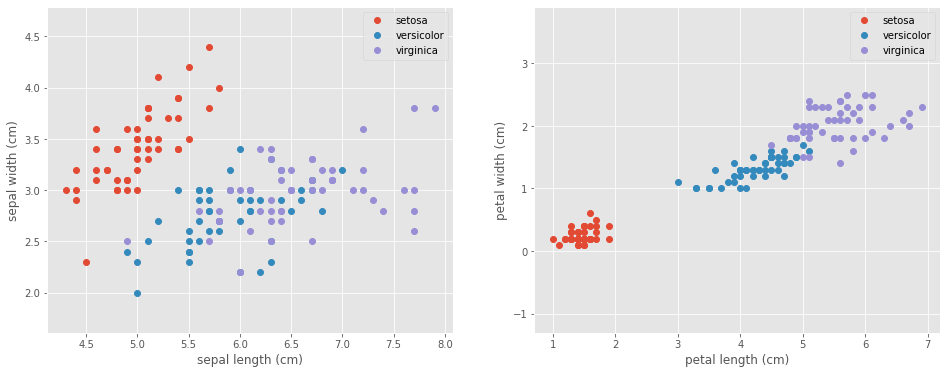

In [3]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=True)

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (105, 4) (105,)
Testing Shape (45, 4) (45,)


In [5]:
# load dataset
iris = elm.read("/content/iris.data")

# create a classifier
elmk = elm.ELMKernel()

# search for best parameter for this dataset
# define "kfold" cross-validation method, "accuracy" as a objective function
# to be optimized and perform 10 searching steps.
# best parameters will be saved inside 'elmk' object
elmk.search_param(iris, cv="kfold", of="accuracy", eval=10)

# split data in training and testing sets
# use 80% of dataset to training and shuffle data before splitting
tr_set, te_set = elm.split_sets(iris, training_percent=.8, perm=True)

#train and test
# results are Error objects
tr_result = elmk.train(tr_set)
te_result = elmk.test(te_set)

print(te_result.get_accuracy)

elmk
##### Start search #####
Kernel function:  rbf  best cv value:  0.9533333333333334
Kernel function:  linear  best cv value:  0.9733333333333335


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Kernel function:  poly  best cv value:  0.9800000000000002
##### Search complete #####

Regressor Parameters

Regularization coefficient:  1.0831785970562564
Kernel Function:  poly
Kernel parameters:  [0.7367577554410882, 2.433039024446756]

CV error:  0.9800000000000002

<bound method Error.get_accuracy of <elm.mltools.Error object at 0x7f85693f7a50>>


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

np.random.seed(42)

def relu(x):
  return np.maximum(x, 0, x)

def hidden_nodes(X):
  G = np.dot(X, input_weights)
  G = G + biases
  H = relu(G)
  return H

def predict(X,output_weights):
  out = hidden_nodes(X)
  out = np.dot(out, output_weights)
  return out

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=True)

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

input_size = X_train.shape[1]
hidden_size = 10

input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

prediction = predict(X_test, output_weights)
correct = 0
total = X_test.shape[0]

for i in range(total):
  predicted = np.round(prediction[i])
  actual = y_test[i]
  if predicted == actual:
    correct += 1
  else: 
    correct += 0

accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

Training Shape (105, 4) (105,)
Testing Shape (45, 4) (45,)
Accuracy for  10  hidden nodes:  1.0


In [7]:
#For single sample prediction
k=40
pred = predict(X_test[k], output_weights)
predicted = np.round(pred)
if predicted == y_test[k]:
  correct = 1
else: 
  correct = 0

print("Actual:",y_test[k], "Predicted:", predicted)
print("Accuracy:", correct*100)

Actual: 2 Predicted: 2.0
Accuracy: 100


In [8]:
import pickle

pickle.dump(output_weights, open('elm_iris.pkl', 'wb'))

In [9]:
# Deserialization of the file
new_weights = pickle.load(open('elm_iris.pkl','rb'))

#For single sample prediction
k=17
pred = predict(X_test[k], new_weights)
predicted = np.round(pred)
if predicted == y_test[k]:
  correct = 1
else: 
  correct = 0

print("Actual:",y_test[k], "Predicted:", predicted)
print("Accuracy:", correct*100)

Actual: 1 Predicted: 1.0
Accuracy: 100


In [ ]:
##http://wdm0006.github.io/sklearn-extensions/extreme_learning_machines.html

In [10]:
!pip install sklearn_extensions

  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24578 sha256=ff8147156b70c6ee37fbd3f61b5b3525ceb9b8eaeee38b291dcde2ca630cbedb
  Stored in directory: /root/.cache/pip/wheels/2b/a8/2c/b8896a9d6768f168eeaa54289c35bc36d6b1ba0c5b99c9cc84
Successfully built sklearn-extensions


In [11]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn_extensions.extreme_learning_machines.elm import GenELMClassifier
from sklearn_extensions.extreme_learning_machines.random_layer import RBFRandomLayer, MLPRandomLayer

np.random.seed(42)

def make_classifiers():
    """

    :return:
    """

    names = ["ELM(10,tanh)", "ELM(10,sinsq)", "ELM(10,tribas)", "ELM(hardlim)", "ELM(20,rbf(0.1))"]

    nh = 1000

    # pass user defined transfer func
    sinsq = (lambda x: np.power(np.sin(x), 2.0))
    srhl_sinsq = MLPRandomLayer(n_hidden=nh, activation_func=sinsq)

    # use internal transfer funcs
    srhl_tanh = MLPRandomLayer(n_hidden=nh, activation_func='tanh')
    srhl_tribas = MLPRandomLayer(n_hidden=nh, activation_func='tribas')
    srhl_hardlim = MLPRandomLayer(n_hidden=nh, activation_func='hardlim')

    # use gaussian RBF
    srhl_rbf = RBFRandomLayer(n_hidden=nh*2, rbf_width=0.1, random_state=0)
    
    classifiers = [GenELMClassifier(hidden_layer=srhl_tanh),
                   GenELMClassifier(hidden_layer=srhl_sinsq),
                   GenELMClassifier(hidden_layer=srhl_tribas),
                   GenELMClassifier(hidden_layer=srhl_hardlim),
                   GenELMClassifier(hidden_layer=srhl_rbf)]

    return names, classifiers


if __name__ == '__main__':  
        
  #datasets = make_datasets()
  names, classifiers = make_classifiers()
   
  # pre-process dataset, split into training and test part
  iris = load_iris()
  X = iris['data']
  y = iris['target']
  
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Split the data set into training and testing
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=True)
  y_test = y_test.reshape(-1, )
  y_train = y_train.reshape(-1, )

  print("Training Shape", X_train.shape, y_train.shape)
  print("Testing Shape", X_test.shape, y_test.shape)

  # iterate over classifiers
  for name, clf in zip(names, classifiers): 
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('Model %s score: %s' % (name, score))
    

Training Shape (105, 4) (105,)
Testing Shape (45, 4) (45,)
Model ELM(10,tanh) score: 0.9333333333333333
Model ELM(10,sinsq) score: 0.9111111111111111
Model ELM(10,tribas) score: 0.9555555555555556
Model ELM(hardlim) score: 0.9111111111111111
Model ELM(20,rbf(0.1)) score: 0.9333333333333333


In [12]:
!pip install numpy --upgrade

     |████████████████████████████████| 15.7 MB 194 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
elm 0.1.3 requires numpy==1.15.4, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
%%writefile elm.py

import numpy as np
np.random.seed(42)

class ELM(object):  
    
  def __init__(self, inputSize, outputSize, hiddenSize):
    """
    Initialize weight and bias between input layer and hidden layer
    Parameters:
    inputSize: int
        The number of input layer dimensions or features in the training data
    outputSize: int
        The number of output layer dimensions
    hiddenSize: int
        The number of hidden layer dimensions        
    """    

    self.inputSize = inputSize
    self.outputSize = outputSize
    self.hiddenSize = hiddenSize       
    
    # Initialize random weight with range [-0.5, 0.5]
    self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

    # Initialize random bias with range [0, 1]
    self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
    
    self.H = 0
    self.beta = 0

  def sigmoid(self, x):
    """
    Sigmoid activation function
    
    Parameters:
    x: array-like or matrix
        The value that the activation output will look for
    Returns:      
        The results of activation using sigmoid function
    """
    return 1 / (1 + np.exp(-1 * x))

  def predict(self, X):
    """
    Predict the results of the training process using test data
    Parameters:
    X: array-like or matrix
        Test data that will be used to determine output using ELM
    Returns:
        Predicted results or outputs from test data
    """
    X = np.matrix(X)
    y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

    return y

  def train(self, X, y):
    """
    Extreme Learning Machine training process
    Parameters:
    X: array-like or matrix
        Training data that contains the value of each feature
    y: array-like or matrix
        Training data that contains the value of the target (class)
    Returns:
        The results of the training process   
    """

    X = np.matrix(X)
    y = np.matrix(y)        
    
    # Calculate hidden layer output matrix (Hinit)
    self.H = (X * self.weight.T) + self.bias

    # Sigmoid activation function
    self.H = self.sigmoid(self.H)

    # Calculate the Moore-Penrose pseudoinverse matriks        
    H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

    # Calculate the output weight matrix beta
    self.beta = H_moore_penrose * y

    return self.H * self.beta

Writing elm.py


In [2]:
%%writefile test_elm_iris.py
from elm import ELM
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

np.random.seed(42)

# Create random classification datasets with 1000 samples
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create instance of ELM object with 10 hidden neuron
elm = ELM(X.shape[1], 1, 10)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=True)
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# Train data
elm.train(X_train,y_train.reshape(-1,1))

# Make prediction from training process
y_pred = elm.predict(X_test)
y_pred = np.round(np.abs(y_pred))
print(y_test, "\n", y_pred.T)
print('Accuracy: ', accuracy_score(y_test, y_pred))

print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 
print(classification_report(y_test, y_pred, target_names=names))

Writing test_elm_iris.py


In [3]:
!python test_elm_iris.py

Training Shape (120, 4) (120,)
Testing Shape (30, 4) (30,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2] 
 [[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 2. 1. 0.
  2. 1. 0. 0. 1. 2.]]
Accuracy:  0.9666666666666667
F1 Score:  0.9610256410256409
Precision Score:  0.9523809523809524
Recall Score:  0.9743589743589745
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [7]:
%%writefile run_elm_iris.py
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

np.random.seed(42)

class ELM(object):  
    
  def __init__(self, inputSize, outputSize, hiddenSize):
    """
    Initialize weight and bias between input layer and hidden layer
    Parameters:
    inputSize: int
        The number of input layer dimensions or features in the training data
    outputSize: int
        The number of output layer dimensions
    hiddenSize: int
        The number of hidden layer dimensions        
    """    

    self.inputSize = inputSize
    self.outputSize = outputSize
    self.hiddenSize = hiddenSize       
    
    # Initialize random weight with range [-0.5, 0.5]
    self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

    # Initialize random bias with range [0, 1]
    self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
    
    self.H = 0
    self.beta = 0

  def sigmoid(self, x):
    """
    Sigmoid activation function
    
    Parameters:
    x: array-like or matrix
        The value that the activation output will look for
    Returns:      
        The results of activation using sigmoid function
    """
    return 1 / (1 + np.exp(-1 * x))

  def predict(self, X):
    """
    Predict the results of the training process using test data
    Parameters:
    X: array-like or matrix
        Test data that will be used to determine output using ELM
    Returns:
        Predicted results or outputs from test data
    """
    X = np.matrix(X)
    y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

    return y

  def train(self, X, y):
    """
    Extreme Learning Machine training process
    Parameters:
    X: array-like or matrix
        Training data that contains the value of each feature
    y: array-like or matrix
        Training data that contains the value of the target (class)
    Returns:
        The results of the training process   
    """

    X = np.matrix(X)
    y = np.matrix(y)        
    
    # Calculate hidden layer output matrix (Hinit)
    self.H = (X * self.weight.T) + self.bias

    # Sigmoid activation function
    self.H = self.sigmoid(self.H)

    # Calculate the Moore-Penrose pseudoinverse matriks        
    H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

    # Calculate the output weight matrix beta
    self.beta = H_moore_penrose * y

    return self.H * self.beta

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
  """
  Generate matrix plot of confusion matrix with pretty annotations.
  The plot image is saved to disk.
  args: 
    y_true:    true label of the data, with shape (nsamples,)
    y_pred:    prediction of the data, with shape (nsamples,)
    filename:  filename of figure file to save
    labels:    string array, name the order of class labels in the confusion matrix.
                use `clf.classes_` if using scikit-learn models.
                with shape (nclass,).
    ymap:      dict: any -> string, length == nclass.
                if not None, map the labels & ys to more understandable strings.
                Caution: original y_true, y_pred and labels must align.
    figsize:   the size of the figure plotted.
  """
  if ymap is not None:
      y_pred = [ymap[yi] for yi in y_pred]
      y_true = [ymap[yi] for yi in y_true]
      labels = [ymap[yi] for yi in labels]
  cm = confusion_matrix(y_true, y_pred)
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_perc = cm / cm_sum.astype(float) * 100
  annot = np.empty_like(cm).astype(str)
  nrows, ncols = cm.shape
  for i in range(nrows):
      for j in range(ncols):
          c = cm[i, j]
          p = cm_perc[i, j]
          if i == j:
              s = cm_sum[i]
              annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
          elif c == 0:
              annot[i, j] = ''
          else:
              annot[i, j] = '%.1f%%\n%d' % (p, c)
  
  cm = pd.DataFrame(cm, index=labels, columns=labels)
  cm.index.name = 'Actual'
  cm.columns.name = 'Predicted'
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, annot=annot, cmap="YlGnBu", fmt='', ax=ax, linewidths=.5)
  #plt.savefig(filename)
  plt.show()

# Create random classification datasets with 1000 samples
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create instance of ELM object with 10 hidden neuron
elm = ELM(X.shape[1], 1, 10)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=True)
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# Train data
elm.train(X_train,y_train.reshape(-1,1))

# Make prediction from training process
y_pred = elm.predict(X_test)
y_pred = np.round(np.abs(y_pred))
print(y_test, "\n", y_pred.T)

print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 
print("\n", classification_report(y_test, y_pred, target_names=names))

cm_analysis(y_test, y_pred, names, ymap=None, figsize=(6,6))
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=names)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
#plt.savefig("Confusion_Matrix.png")

Overwriting run_elm_iris.py


In [8]:
%matplotlib inline

Training Shape (120, 4) (120,)
Testing Shape (30, 4) (30,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2] 
 [[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 2. 1. 0.
  2. 1. 0. 0. 1. 2.]]

Accuracy:  0.9666666666666667
F1 Score:  0.9610256410256409
Precision Score:  0.9523809523809524
Recall Score:  0.9743589743589745

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



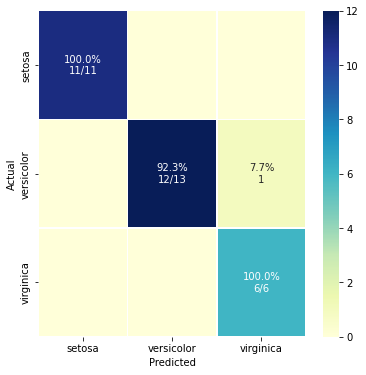

In [9]:
%run run_elm_iris.py

In [10]:
#https://hpelm.readthedocs.io/en/latest/
!pip install git+https://github.com/akusok/hpelm

  Cloning https://github.com/akusok/hpelm to /tmp/pip-req-build-9o847hlk
  Running command git clone -q https://github.com/akusok/hpelm /tmp/pip-req-build-9o847hlk


Training Shape (135, 4) (135,)
Testing Shape (15, 4) (15,)

Accuracy:  1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



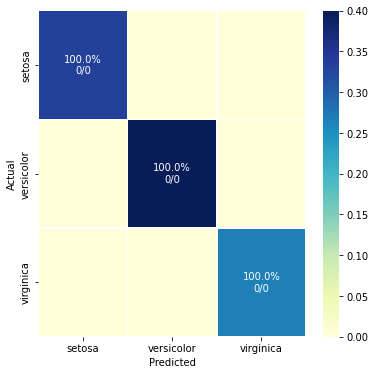

In [11]:
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hpelm import ELM
from mlxtend.plotting import plot_confusion_matrix
from scipy import ndimage
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline

np.random.seed(42)

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
  """
  Generate matrix plot of confusion matrix with pretty annotations.
  The plot image is saved to disk.
  args: 
    y_true:    true label of the data, with shape (nsamples,)
    y_pred:    prediction of the data, with shape (nsamples,)
    filename:  filename of figure file to save
    labels:    string array, name the order of class labels in the confusion matrix.
                use `clf.classes_` if using scikit-learn models.
                with shape (nclass,).
    ymap:      dict: any -> string, length == nclass.
                if not None, map the labels & ys to more understandable strings.
                Caution: original y_true, y_pred and labels must align.
    figsize:   the size of the figure plotted.
  """
  if ymap is not None:
      y_pred = [ymap[yi] for yi in y_pred]
      y_true = [ymap[yi] for yi in y_true]
      labels = [ymap[yi] for yi in labels]
  cm = confusion_matrix(y_true, y_pred, normalize='all')
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_perc = cm / cm_sum.astype(float) * 100
  annot = np.empty_like(cm).astype(str)
  nrows, ncols = cm.shape
  for i in range(nrows):
      for j in range(ncols):
          c = cm[i, j]
          p = cm_perc[i, j]
          if i == j:
              s = cm_sum[i]
              annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
          elif c == 0:
              annot[i, j] = ''
          else:
              annot[i, j] = '%.1f%%\n%d' % (p, c)
  
  cm = pd.DataFrame(cm, index=labels, columns=labels)
  cm.index.name = 'Actual'
  cm.columns.name = 'Predicted'
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(cm, annot=annot, cmap="YlGnBu", fmt='', ax=ax, linewidths=.5)
  #plt.savefig(filename)
  plt.show()


# Threshold value for classification (<= negative, > positive)
THRESHOLD = 0.5

# Create random classification datasets with 1000 samples
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create ELM
elm = ELM(4, 1)
elm.add_neurons(10, 'sigm')
elm.add_neurons(9, 'lin')

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=True)
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# Train data
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  elm.train(X_train, y_train)
  y_pred = elm.predict(X_test)
  y_pred = np.round(np.abs(y_pred))
  y_pred = np.array(y_pred)
  y_pred = np.where(y_pred >= 2, 2, y_pred)

print('\nAccuracy: ', accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 
print("\n",classification_report(y_test, y_pred, target_names=names))

cm_analysis(y_test, y_pred, names, ymap=None, figsize=(6,6))